<div class='alert alert-block alert-success'>

# Exercises II Regression (acquisition and prep)

<hr style='border:2px solid green'>

Let's set up an example scenario as perspective for our regression exercises using the Zillow dataset.

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

In [1]:
import os
import wrangle as w

#standard DS imports
import pandas as pd
import numpy as np

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

#Connect to SQL DataBase
import env

## 1. Acquire `bedroomcnt`, `bathroomcnt`, `calculatedfinishedsquarefeet`, `taxvaluedollarcnt`, `yearbuilt`, `taxamount`, and `fips` from the `zillow` database for all 'Single Family Residential' properties.

In [2]:
### My function... fix it after the review ###

# def get_zillow_data2():
#     '''
#     Retrieves the zillow dataframe. The MySQL query will return the 7 needed columns from the properties_2017 table.
#     The check file function will assure the zillow file exists and what to do if it doesn't.
#     '''
#     url = env.get_db_url('zillow')
#     query = '''
#     Select bathroomcnt,
#         bedroomcnt,
#         calculatedfinishedsquarefeet, 
#         fips,
#         taxamount,
#         taxvaluedollarcnt,
#         yearbuilt
#     FROM properties_2017
#     WHERE propertylandusetypeid = '261'
#     LIMIT 100
#     '''
    
#     filename = 'zillow.csv'

#     #call the check_file_exists fuction 
#     df = check_file_exists(filename, query, url)
#     return df

In [3]:
url = env.get_db_url('zillow')
query = '''
    Select bathroomcnt,
		bedroomcnt,
        calculatedfinishedsquarefeet, 
        fips,
        taxamount,
        taxvaluedollarcnt,
        yearbuilt
    FROM properties_2017
    WHERE propertylandusetypeid = '261'
    LIMIT 100
    '''

In [4]:
zillow_sample = pd.read_sql(query, url)
zillow_sample.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,taxamount,taxvaluedollarcnt,yearbuilt
0,0.0,0.0,NaN,6037.0,NaN,27516.0,NaN
1,0.0,0.0,NaN,6037.0,NaN,10.0,NaN
2,0.0,0.0,NaN,6037.0,NaN,10.0,NaN
3,0.0,0.0,NaN,6037.0,174.21,2108.0,NaN
4,2.0,4.0,3633.0,6037.0,6941.39,296425.0,2005.0


In [5]:
### our acquire
def get_zillow_data(): 
    filename = 'zillow.csv'
    
    if os.path.isfile(filename):    
        return pd.read_csv(filename, index_col=0)
    
    else:
        # Create the url
        url = env.get_db_url('zillow')
        
        sql_query = '''
        Select bathroomcnt,
        bedroomcnt,
        calculatedfinishedsquarefeet, 
        fips,
        taxamount,
        taxvaluedollarcnt,
        yearbuilt
        FROM properties_2017
        WHERE propertylandusetypeid = '261'
        '''
    # Read the SQL query into a dataframe
    df = pd.read_sql(sql_query, url)
    
    # Write that dataframe to disk for later. Called 'caching' the data for later
    df.to_csv(filename)
    
    # Return the dataframe to the calling code
    return df

In [6]:
df = get_zillow_data()

In [7]:
df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,taxamount,taxvaluedollarcnt,yearbuilt
0,0.0,0.0,NaN,6037.0,NaN,27516.0,NaN
1,0.0,0.0,NaN,6037.0,NaN,10.0,NaN
2,0.0,0.0,NaN,6037.0,NaN,10.0,NaN
3,0.0,0.0,NaN,6037.0,174.21,2108.0,NaN
4,2.0,4.0,3633.0,6037.0,6941.39,296425.0,2005.0


## 2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.

In [8]:
# datatypes, nulls and column names
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bathroomcnt                   float64
 1   bedroomcnt                    float64
 2   calculatedfinishedsquarefeet  float64
 3   fips                          float64
 4   taxamount                     float64
 5   taxvaluedollarcnt             float64
 6   yearbuilt                     float64
dtypes: float64(7)
memory usage: 131.4 MB


In [9]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bathroomcnt                   2152852 non-null  float64
 1   bedroomcnt                    2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   fips                          2152863 non-null  float64
 4   taxamount                     2148421 non-null  float64
 5   taxvaluedollarcnt             2152370 non-null  float64
 6   yearbuilt                     2143526 non-null  float64
dtypes: float64(7)
memory usage: 131.4 MB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00


In [11]:
df.fips.value_counts()

fips
6037.0    1431811
6059.0     555077
6111.0     165975
Name: count, dtype: int64

<hr style='border:2px solid green'>

### Clean the columns

In [12]:
df = df.rename(columns={'bedroomcnt': 'bedrooms',
                        'bathroomcnt': 'bathrooms',
                        'calculatedfinishedsquarefeet': 'area',
                        'taxamount': 'tax_amount',
                        'taxvaluedollarcnt': 'tax_value',
                        'yearbuilt': 'year_built',
                        'fips': 'county'})

In [13]:
df.columns

Index(['bathrooms', 'bedrooms', 'area', 'county', 'tax_amount', 'tax_value',
       'year_built'],
      dtype='object')

In [14]:
df.head()

,bathrooms,bedrooms,area,county,tax_amount,tax_value,year_built
0,0.0,0.0,NaN,6037.0,NaN,27516.0,NaN
1,0.0,0.0,NaN,6037.0,NaN,10.0,NaN
2,0.0,0.0,NaN,6037.0,NaN,10.0,NaN
3,0.0,0.0,NaN,6037.0,174.21,2108.0,NaN
4,2.0,4.0,3633.0,6037.0,6941.39,296425.0,2005.0


<hr style='border:2px solid green'>

### Handle Null Values

In [15]:
col = df.columns.to_list()
col

['bathrooms',
 'bedrooms',
 'area',
 'county',
 'tax_amount',
 'tax_value',
 'year_built']

In [16]:
num_missing = df[col].isnull().sum()
num_missing

bathrooms       11
bedrooms        11
area          8484
county           0
tax_amount    4442
tax_value      493
year_built    9337
dtype: int64

In [17]:
pct_missing = num_missing/df.shape[0]
pct_missing
### 9,000 + missing for yearbuilt sounds like a lot but is actually only .4% missing so not bad.

bathrooms     0.000005
bedrooms      0.000005
area          0.003941
county        0.000000
tax_amount    0.002063
tax_value     0.000229
year_built    0.004337
dtype: float64

In [18]:
df = df.dropna()

<div class='alert alert-block alert-success'>
<b>NOTE:</b>
    
- To drop nulls in specific columns
- df.dropna(subset=['bedrooms', 'bathrooms'])

In [19]:
### Dropped ALL nulls because they weren't much compared to the amount of data
df.isnull().sum()

bathrooms     0
bedrooms      0
area          0
county        0
tax_amount    0
tax_value     0
year_built    0
dtype: int64

<hr style='border:2px solid green'>

### Check Our Datatypes

In [20]:
df.dtypes
### let's see which to change... 
### can't have half a bedroom or won't be using a fraction of a year

bathrooms     float64
bedrooms      float64
area          float64
county        float64
tax_amount    float64
tax_value     float64
year_built    float64
dtype: object

In [21]:
df.head(3)

,bathrooms,bedrooms,area,county,tax_amount,tax_value,year_built
4,2.0,4.0,3633.0,6037.0,6941.39,296425.0,2005.0
6,4.0,3.0,1620.0,6037.0,10244.94,847770.0,2011.0
7,2.0,3.0,2077.0,6037.0,7924.68,646760.0,1926.0


In [22]:
### wow that's a lot of bathrooms
df[df['bathrooms'] == 32]

,bathrooms,bedrooms,area,county,tax_amount,tax_value,year_built
1657947,32.0,10.0,39170.0,6037.0,372142.72,31038350.0,2009.0


<div class="alert alert-block alert-info"> 
<b>NOTE:</b> 

We will want to confirm that we are dealing with whole numbers before we change floats to integers.


In order to do this, we can create a simple for loop through our values for each column

In [23]:
#confrim whole numbers
for col in df.columns:
    print(col)
    print(df[col].value_counts().sort_index())
    print()

bathrooms
bathrooms
0.00       4274
0.50         16
1.00     412582
1.50      31157
1.75          3
2.00     942463
2.50     142827
3.00     422398
3.50      28464
4.00      82039
4.50      19474
5.00      28306
5.50       6201
6.00      10717
6.50       1330
7.00       4381
7.50        382
8.00       1681
8.50        108
9.00        707
9.50         50
10.00       322
10.50        14
11.00       145
11.50         3
12.00        73
12.50         3
13.00        39
14.00        25
14.50         1
15.00        17
16.00        12
17.00         4
18.00         8
19.00         1
19.50         1
20.00         6
32.00         1
Name: count, dtype: int64

bedrooms
bedrooms
0.0       4397
1.0      22895
2.0     334221
3.0     962944
4.0     633608
5.0     150671
6.0      25117
7.0       4792
8.0       1103
9.0        290
10.0       118
11.0        34
12.0        12
13.0        15
14.0         7
15.0         5
16.0         2
18.0         3
25.0         1
Name: count, dtype: int64

area
area
1.0  

In [24]:
### lambda function method
has_non_zero_decimal = df['bathrooms'].apply(lambda x: x % 1 !=0)
### checks for decimal values

In [25]:
has_non_zero_decimal.sum()
### bathroom had 230,034 so keep as float
### bedroom had 0 so change to int

230034

In [35]:
#put it all together for all the columns 
##so we can make sure those floats should be integers

#include these columns
columns_to_check = ['bedrooms', 'bathrooms', 'area', 'tax_value', 'year_built', 'tax_amount', 'county']

# create a dictionary to store the count of non-zero decimal places for each column
count_of_non_zero_decimal = {}

# iterate through columns and check for non-zero decimal places
for column in columns_to_check:
    has_non_zero_decimal = (df[column] % 1 != 0).sum()
    
    # store the count in the dictionary
    count_of_non_zero_decimal[column] = has_non_zero_decimal

# display the count of non-zero decimal places for each column
print("Count of Non-Zero Decimal Places in Each Column:")
for column, count in count_of_non_zero_decimal.items():
    print(f"{column}: {count}")

Count of Non-Zero Decimal Places in Each Column:
bedrooms: 0
bathrooms: 230034
area: 0
tax_value: 0
year_built: 0
tax_amount: 2111620
county: 0


In [36]:
#columns we want to be integers
make_ints = ['bedrooms', 'area', 'tax_amount', 'year_built', 'county']

In [37]:
#look through them to change the datatype
for col in make_ints:
    df[col] = df[col].astype(int)

In [38]:
df.dtypes

bathrooms     float64
bedrooms        int64
area            int64
county          int64
tax_amount      int64
tax_value     float64
year_built      int64
dtype: object

<div class="alert alert-block alert-info"> 
<b>NOTE:</b> 

Fips is another feature we want to investigate

- 6037: LA
- 6059: Orange County
- 6111: Ventura County


In [27]:
df.county = df.county.map({6037:'LA', 6059:'Orange', 6111:'Ventura'})

In [28]:
df.county ### the 3 numbers assigned have now been given the name of the county!

4              LA
6              LA
7              LA
11             LA
14             LA
            ...  
2152856        LA
2152858    Orange
2152859    Orange
2152861    Orange
2152862        LA
Name: county, Length: 2140235, dtype: object

In [40]:
df.sample(10)

,bathrooms,bedrooms,area,county,tax_amount,tax_value,year_built
180882,1.5,2,1270,6059,3095,259664.0,1972
1758330,3.0,4,3349,6037,4144,261122.0,1966
144356,3.0,3,2790,6037,7660,694646.0,1980
488556,1.0,2,858,6037,668,43650.0,1921
1676497,1.0,1,528,6059,1347,91350.0,1947
431196,2.0,4,1891,6111,2025,152840.0,1976
579566,3.0,6,3224,6059,7908,705080.0,1966
967056,2.0,4,1428,6059,883,56144.0,1966
1580762,2.5,3,1794,6059,2702,224525.0,1977
1717804,1.0,2,1417,6037,2356,175048.0,1951


<hr style='border:2px solid green'>

### Visualize Our Data

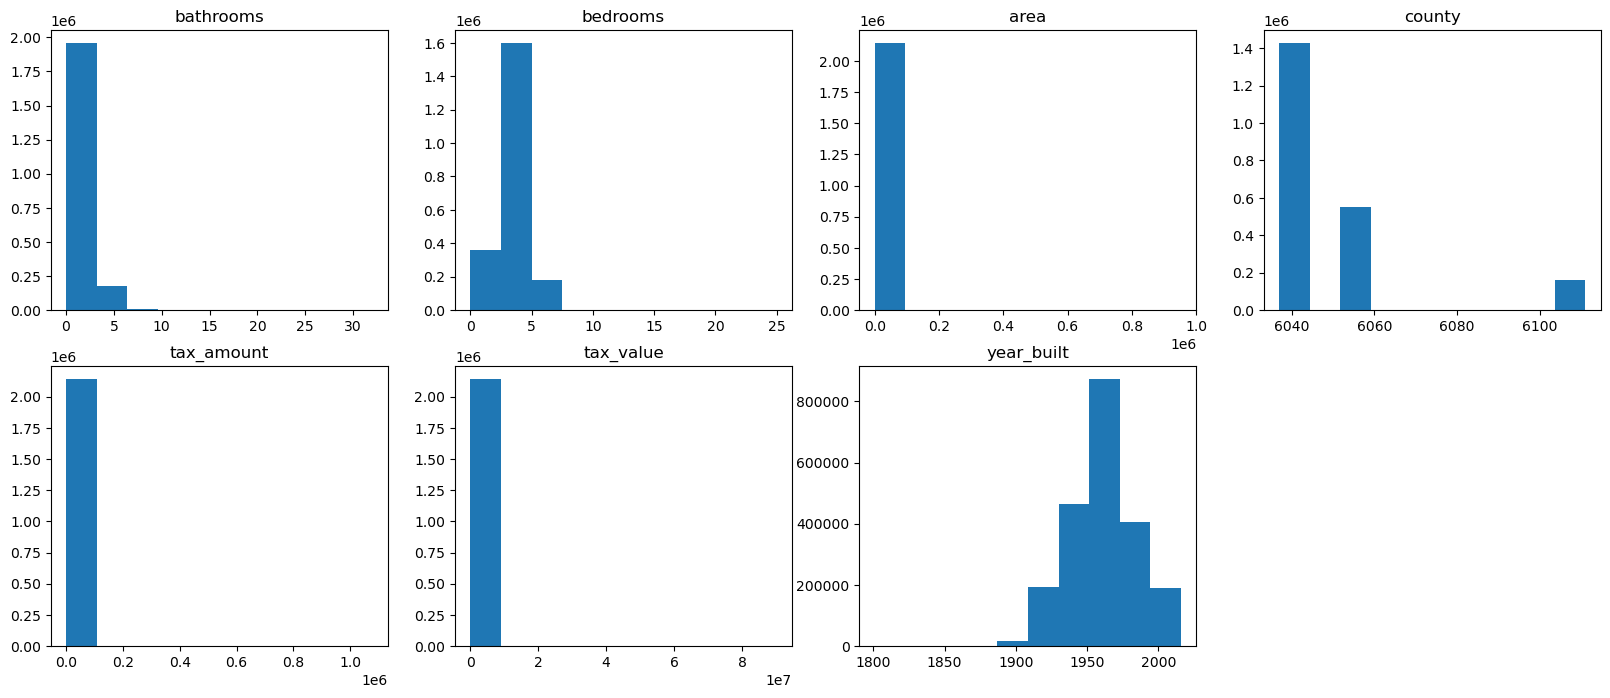

In [46]:
plt.figure(figsize=(20,8))

for i, col in enumerate(df.columns):
    plot_number = i+1
    plt.subplot(2,4, plot_number)
    plt.title(col)
    plt.hist(df[col])
plt.show()

bathrooms


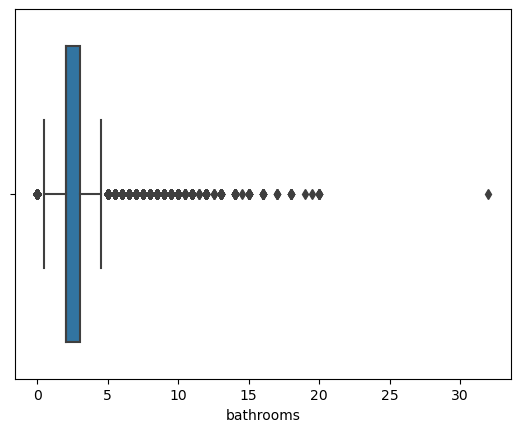

bathrooms
0.00       4274
0.50         16
1.00     412582
1.50      31157
1.75          3
2.00     942463
2.50     142827
3.00     422398
3.50      28464
4.00      82039
4.50      19474
5.00      28306
5.50       6201
6.00      10717
6.50       1330
7.00       4381
7.50        382
8.00       1681
8.50        108
9.00        707
9.50         50
10.00       322
10.50        14
11.00       145
11.50         3
12.00        73
12.50         3
13.00        39
14.00        25
14.50         1
15.00        17
16.00        12
17.00         4
18.00         8
19.00         1
19.50         1
20.00         6
32.00         1
Name: count, dtype: int64

bedrooms


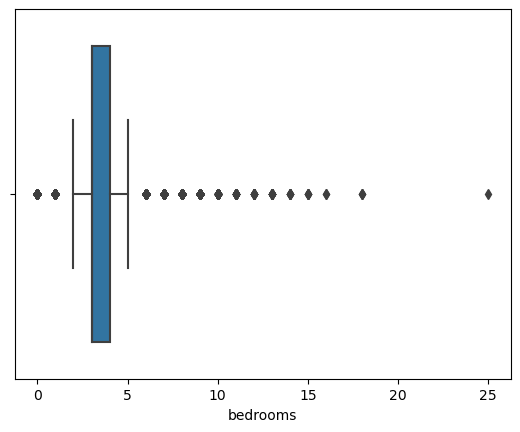

bedrooms
0       4397
1      22895
2     334221
3     962944
4     633608
5     150671
6      25117
7       4792
8       1103
9        290
10       118
11        34
12        12
13        15
14         7
15         5
16         2
18         3
25         1
Name: count, dtype: int64

area


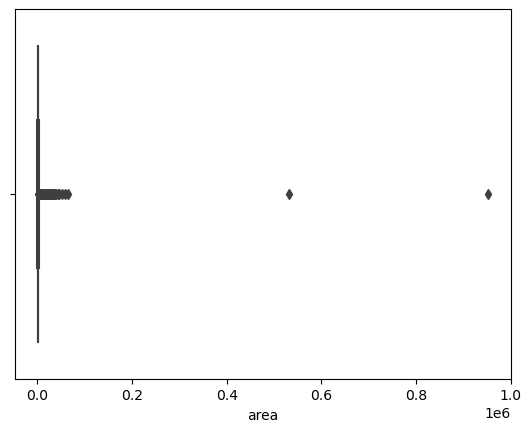

area
1         6
2         2
3         7
7         1
10        2
         ..
52503     1
59220     1
63692     1
531118    1
952576    1
Name: count, Length: 10557, dtype: int64

tax_amount


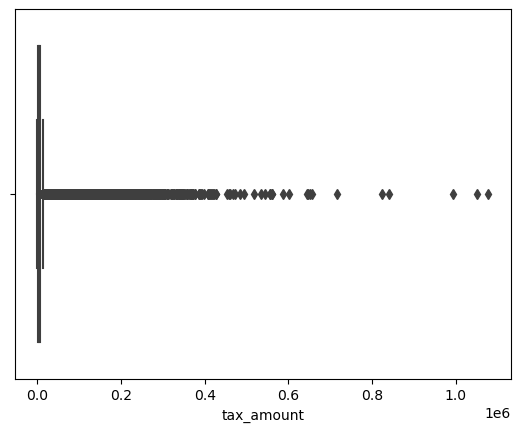

tax_amount
6           1
13         15
16          1
18          2
20          5
           ..
824166      1
841059      1
994030      1
1052070     1
1078101     1
Name: count, Length: 46583, dtype: int64

tax_value


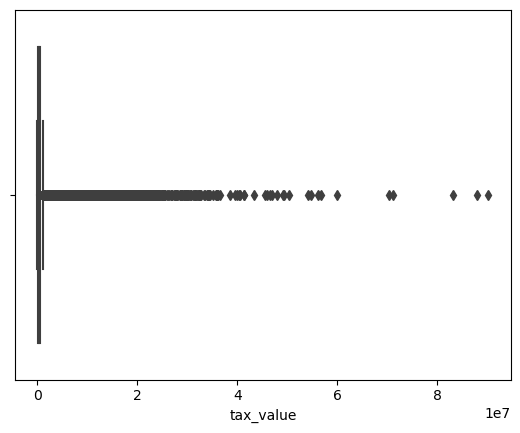

tax_value
22.0          10
23.0           6
31.0           1
46.0           1
101.0          1
              ..
70416358.0     1
71067500.0     1
83196095.0     1
88020448.0     1
90188462.0     1
Name: count, Length: 588178, dtype: int64

year_built


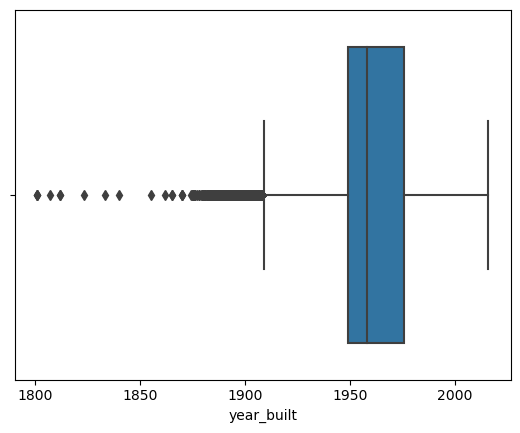

year_built
1801       3
1807       1
1812       2
1823       1
1833       1
        ... 
2012    3431
2013    4768
2014    4706
2015    3551
2016      97
Name: count, Length: 153, dtype: int64



In [51]:
col_not_county = df.columns[:3].tolist() + df.columns[4:7].tolist()

for col in col_not_county:
    print(col)
    sns.boxplot(data=df, x=col)
    plt.show()
    
    print(df[col].value_counts().sort_index())
    print()

## 3. Write a function to split your data into train, validate, and test.

In [16]:
from sklearn.model_selection import train_test_split

In [26]:
def splitting_data(df, seed=123): ### No longer needs the col key argument because we only stratify on Classification!
    '''
    Just like the splitting Titanic function but it can be used for any df now!
    must provide the df and column. Does not clean it though
    '''

    #first split
    train, validate_test = train_test_split(df,
                     train_size=0.6,
                     random_state=seed
                     #stratify=df[col]
                    )
    
    #second split
    validate, test = train_test_split(validate_test,
                                     train_size=0.5,
                                      random_state=seed
                                      #stratify=validate_test[col]
                        
                                     )
    print(f'train ----> {train.shape} 60%')
    print(f'validate -> {validate.shape}  20%')
    print(f'test -----> {test.shape}  20%')
    return train, validate, test

In [3]:
train, validate, test = w.splitting_data(df)

train ----> (1284141, 7) 60%
validate -> (428047, 7)  20%
test -----> (428047, 7)  20%


In [12]:
train.shape

(1284141, 7)

In [11]:
validate.shape

(428047, 7)

In [13]:
test.shape

(428047, 7)

## 4. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe with no missing values in your wrangle.py file. Name your final function wrangle_zillow.

In [53]:
import os

In [54]:
def get_zillow_data(): 
    '''
    This function acquires zillow.csv if it is available.
    If not, it'll make the MYSQL connection and use the query below to 
    read it in the datafram.
    It'll also write/create the csv for next time.
    '''
    filename = 'zillow.csv'
    
    if os.path.isfile(filename):
        return pd.read_csv(filename, index_col=0)
    
    else:
        # Create the url
        url = env.get_db_url('zillow')
        
        sql_query = '''
        Select bathroomcnt,
        bedroomcnt,
        calculatedfinishedsquarefeet, 
        fips,
        taxamount,
        taxvaluedollarcnt,
        yearbuilt
        FROM properties_2017
        WHERE propertylandusetypeid = '261'
        '''
    # Read the SQL query into a df
    df = pd.read_sql(sql_query, url)
    
    # Write that df to disk for later. Called 'caching' the data for later.
    df.to_csv(filename)
    
    # Return the dataframe to the calling code
    return df

In [66]:
def prep_zillow(df):
    '''
    This function; 
    - takes in a df
    - renames the columns
    - drops all null values
    - changes datatypes for appropriate columns
    - renames fips to actual county names.
    - returns a clean df
    '''
    df = df.rename(columns={'bedroomcnt': 'bedrooms',
                        'bathroomcnt': 'bathrooms',
                        'calculatedfinishedsquarefeet': 'area',
                        'taxamount': 'tax_amount',
                        'taxvaluedollarcnt': 'tax_value',
                        'yearbuilt': 'year_built',
                        'fips': 'county'})
    
    df = df.dropna()
    
    make_ints = ['bedrooms', 'area', 'tax_value', 'year_built']
    
    for col in make_ints:
        df[col] = df[col].astype(int)
        
    df.county = df.county.map({6037:'LA', 6059:'Orange', 6111:'Ventura'})
    
    return df

In [67]:
df = get_zillow_data()

In [68]:
df.head(3)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,taxamount,taxvaluedollarcnt,yearbuilt
0,0.0,0.0,NaN,6037.0,NaN,27516.0,NaN
1,0.0,0.0,NaN,6037.0,NaN,10.0,NaN
2,0.0,0.0,NaN,6037.0,NaN,10.0,NaN


In [69]:
def wrangle_zillow():
    '''
    This function;
    - uses the get_zillo_data() function to acquire the Zillow data
    - uses the prep_zillo(df) function to prepare the Zillow data
    - return the clean df
    '''
    df = prep_zillow(get_zillow_data())
    return df

In [2]:
df = w.wrangle_zillow()

In [5]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bathrooms   2140235 non-null  float64
 1   bedrooms    2140235 non-null  int64  
 2   area        2140235 non-null  int64  
 3   county      2140235 non-null  object 
 4   tax_amount  2140235 non-null  float64
 5   tax_value   2140235 non-null  int64  
 6   year_built  2140235 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 130.6+ MB
